In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
"/content/drive/MyDrive/deep/images_001.zip"

'/content/drive/MyDrive/deep/images_001.zip'

In [4]:
import zipfile

# zip_pathをzipファイルへの正しいパスに修正します
# The zip_path should point to the zip file itself, not a directory inside it.
zip_path = "/content/drive/MyDrive/deep/images_001.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
  # 必要であれば、extractallの引数で解凍先のディレクトリを指定します
  # Specify the extraction directory if needed
  zip_ref.extractall("archive")

# print は引数がないと何も表示しません。何か表示したい場合は引数を追加してください。
# If you want to print something, add arguments to the print function.
# print("Zip file extracted successfully.")

In [5]:
import os
print(os.listdir("archive")) # List the contents of the extracted directory

['images_001', '__MACOSX']


In [6]:
import pandas as pd

csv_path = "/content/drive/MyDrive/deep/Data_Entry_2017.csv"

df = pd.read_csv(csv_path)

df.head

<bound method NDFrame.head of              Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0          2749                        0.143  0.143          NaN  
1          2729                        0.143  0.143          NaN  
2          2048                        0.168  0.168          NaN  
3          2048                        0.171  0.171          NaN  
4          2991                        0.143  0.143          NaN  
...         ...                          ...    ...          ...  
112115     2500                        0.168  0.168          NaN  
112116     2500                        0.168  0.168          NaN  
112117     2500                        0.168  0.168          NaN  
112118     2500                        0.168  0.168          NaN  
112119     2500                        0.171  0.171          NaN  

[112120 rows x 12 columns]>

In [10]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/deep/Data_Entry_2017.csv")

# Massを含むかどうかで癌(1)　or 癌じゃない(0)のラベルを作る
df["Cancer"] = df["Finding Labels"].apply(lambda x: 1 if "Mass" in x else 0)

print(df["Cancer"].value_counts())

df[["Image Index", "Finding Labels", "Cancer"]].head()

Cancer
0    106338
1      5782
Name: count, dtype: int64


,Image Index,Finding Labels,Cancer
0,00000001_000.png,Cardiomegaly,0
1,00000001_001.png,Cardiomegaly|Emphysema,0
2,00000001_002.png,Cardiomegaly|Effusion,0
3,00000002_000.png,No Finding,0
4,00000003_000.png,Hernia,0


In [11]:

import os
from tqdm import tqdm
import cv2
import numpy as np

image_dir = "images_001/images"

images = []
labels = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
  filename = row["Image Index"]
  label = row["Cancer"]
  image_path = os.path.join(image_dir, filename)



  if os.path.exists(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128, 128))
    images.append(img)
    labels.append(label)


X = np.array(images)
y = np.array(labels)


print("画像データの形:", len(X))
print("ラベルの形:", len(y))

100%|██████████| 112120/112120 [00:09<00:00, 11369.47it/s]

画像データの形: 0
ラベルの形: 0


In [12]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# image_dirを修正して、解凍先のディレクトリ内の画像ディレクトリを指すようにします
# Fix image_dir to point to the image directory within the extraction directory
image_dir = "archive/images_001/images"

images = []
labels = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
  filename = row["Image Index"]
  label = row["Cancer"]
  image_path = os.path.join(image_dir, filename)



  if os.path.exists(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128, 128))
    images.append(img)
    labels.append(label)


X = np.array(images)
y = np.array(labels)


print("画像データの形:", len(X))
print("ラベルの形:", len(y))



100%|██████████| 112120/112120 [01:32<00:00, 1209.61it/s] 

画像データの形: 4999
ラベルの形: 4999


In [13]:
print("Xの中身の数:",len(X))
print("ラベルの数:", len(y))

Xの中身の数: 4999
ラベルの数: 4999


In [14]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = X.reshape(-1, 128, 128, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("学習データ数:", len(X_train))
print("テストデータ数:", len(X_test))

学習データ数: 3999
テストデータ数: 1000


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,345 (14.13 MB)

 Trainable params: 3,705,345 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 766ms/step - accuracy: 0.9692 - loss: 0.2424 - val_accuracy: 0.9680 - val_loss: 0.1549
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 769ms/step - accuracy: 0.9683 - loss: 0.1517 - val_accuracy: 0.9680 - val_loss: 0.1485
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 751ms/step - accuracy: 0.9656 - loss: 0.1505 - val_accuracy: 0.9680 - val_loss: 0.1727
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 708ms/step - accuracy: 0.9653 - loss: 0.1476 - val_accuracy: 0.9680 - val_loss: 0.1736
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 693ms/step - accuracy: 0.9661 - loss: 0.1335 - val_accuracy: 0.9680 - val_loss: 0.1802


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("テスト精度:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9680 - loss: 0.1874
テスト精度: 0.9679999947547913


In [18]:
model.save('my_model.h5')

In [21]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
予測 (0=癌なし, 1=癌): 0
正解ラベル: 0


<ipython-input-24-884303071>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("予測 (0=癌なし, 1=癌):", int(prediction[0] > 0.5))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph

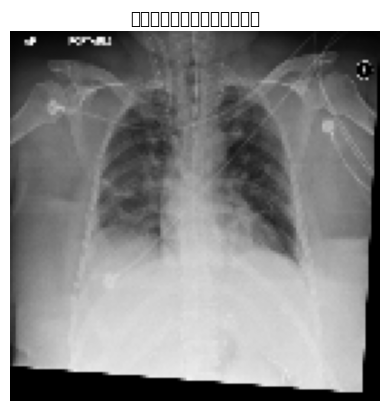

In [24]:
import random
import matplotlib.pyplot as plt

# ランダムに１枚選ぶ
index = random.randint(0, len(X_test) - 1)
sample_image = X_test[index]
sample_label = y_test[index]

# 予測
prediction = model.predict(sample_image.reshape(1, 128, 128, 1))

print("予測 (0=癌なし, 1=癌):", int(prediction[0] > 0.5))
print("正解ラベル:", sample_label)


#画像を表示
plt.imshow(sample_image.reshape(128, 128), cmap='gray')
plt.title("この画像を予測した結果です")
plt.axis('off')
plt.show()

In [25]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [26]:
from tensorflow.keras.models import load_model

model = load_model("cancer_detector_model.h5")

In [38]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (128, 128))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 128, 128, 1)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30284 (\N{CJK UNIFIED IDEOGRAPH-764C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

AIの予測: 癌は見られません(陰性)


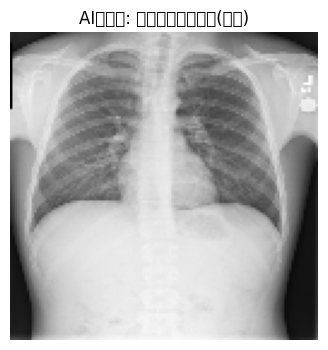

In [35]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測: 癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()

In [36]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [37]:
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")


In [52]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (128, 128))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 128, 128, 1)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

Saving 癌.jpg to 癌 (1).jpg
Uploaded file: 癌 (1).jpg
Image loaded and processed successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
AIの予測: 癌は見られません(陰性)


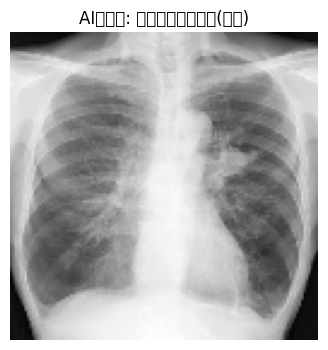

In [54]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測：癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()